<a href="https://colab.research.google.com/github/montimaj/Deep-Learning-SE-6213/blob/master/HW6/HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYS ENG 6213 - Deep Learning and Advanced Neural Networks 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd 'drive/My Drive/SysEng 6213 Fall 2020 Sayantan Majumdar /HW6'
!ls

/content/drive/.shortcut-targets-by-id/1xpWpUfn0NqGtbgAP_303jr6QW5RKzJPR/SysEng 6213 Fall 2020 Sayantan Majumdar /HW6
adagrad.png  HW#6.ipynb  MNIST_data  __pycache__  sgd_m.png  utils.py
adam.png     layers.py	 n_model.py  rms.png	  sgd.png


### Homework#6: Optimization Methods

So far you used stochastic gradient descent (SGD) to train the two layered neural network. The algorithms is given below: 


<img src="sgd.png" alt="Drawing" style="width: 600px;"/>

The update rule is given as $\theta = \theta - \epsilon * g$ where $\theta$ is the layer weights, $\epsilon$ is learning rate and $g$ is gradient for $\theta$. However, there are few problems with SGD like: 
1. local minima or saddle points
2. Jitter and slow progress towards global minima (very common for high dimensional architectures)
3. Noisy (since we use mini batches during training, the graients may not always provie the correct information)

In this homework you will explore other optimization methods that can overcome the limitations of SGD.

Note: We did not implement correct regularization values as it is not the main focus for the assignmet.


### Demo for SGD

In [3]:
# Import the functions
from layers import *
from utils import *
# Set up the packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

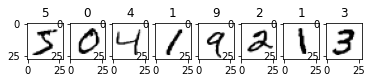

In [4]:
# Load the training data
inputs, labels = load_images_with_labels()

# View first 8 examples
fig, ax = plt.subplots(1,8)
labl = []
for i in range(8):
    ax[i].imshow(inputs[i], cmap=mpl.cm.Greys)
    ax[i].set_title(labels[i])
plt.show()

In [5]:
# Pre-processing the data
train=inputs.reshape(60000,784) # reshape the inputs shape from (60000,28,28) to (60000,784)
train = np.float32(train) # change the datatype to float
train /= np.max(train,axis=1).reshape(-1,1) # Normalize the data between 0 and 1

# Now we separate the inputs into training and validation
train_ = train[0:50000,:] # We use first 50000 images for training
tr_labels = labels[0:50000]
val = train[50000:60000,:] # We use the last 10000 images for validation
val_labels = labels[50000:60000]
data = {'train':train_,'tr_targets':tr_labels,'val':val,'tr_val':val_labels}



In [6]:
# Initialize two_layered_NN instance
from n_model import n_layered_NN
model = n_layered_NN(data,regularization_type = 'dropout',n=2,hidden_layer_sizes=[100,100])
# Train the two layered neural network
_,loss_history,train_acc_history,val_acc_history=model.train()

***************************************************************
|                  Model Specifications:                      |
***************************************************************
input dimensions         :(50000, 784)
output dimensions        :10
number of hidden layers  :2
hidden layer dimensions  :[100, 100]
learning rate            :0.01
batch size               :50
number of epochs         :70
---------------------------------------------------------------
regularization type      :dropout
dropout keep probability :0.8
---------------------------------------------------------------
optimization type        :SGD
---------------------------------------------------------------
Epoch 0/70
Train accuracy: 0.817 Validation accuracy: 0.8311
Epoch 1/70
Train accuracy: 0.85796 Validation accuracy: 0.8676
Epoch 2/70
Train accuracy: 0.87624 Validation accuracy: 0.8866
Epoch 3/70
Train accuracy: 0.88776 Validation accuracy: 0.8949
Epoch 4/70
Train accuracy: 0.89696 Validation accu

In [7]:
# print best accuracies
print('Best accuracy on training data: '+str(np.max(train_acc_history)))
print('Best accuracy on test data :'+str(np.max(val_acc_history)))

sgd = {'cost':loss_history,'tr_Acc':train_acc_history,'val_acc':val_acc_history}
pickle_out = open("sgd.pickle","wb")
pickle.dump(sgd, pickle_out)
pickle_out.close()

Best accuracy on training data: 0.96594
Best accuracy on test data :0.9632


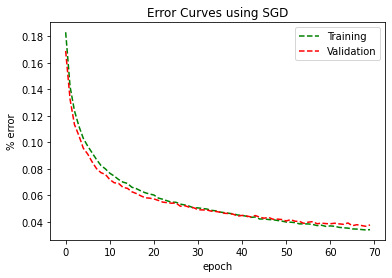

In [8]:
# Plot the accuracy curves
plt.plot(np.subtract(1,train_acc_history),'g--',label='Training')
plt.plot(np.subtract(1,val_acc_history),'r--',label='Validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('% error')
plt.title('Error Curves using SGD')
plt.show()

 ####  ------------------------------------------------------------------------- END OF DEMO -------------------------------------------------------------------------------

 ### 1. SGD with Momentum 

This approach uses a term called velocity which accumulates the gradient elements. This makes the algorithm converge faster and solves the problems in SGD. The $\alpha$ takes of role of friction and usually has a high value like 0.9. It helps to decay the velocity in each iteration. 

Advantages:
- Prevents getting stuck in local minima because of the momentum.
- Jitter is minimized as momentum reduces the step size in unnecessary direction and accelarates towards the global minima.

Disadvantages:
- The disadvantage with this approach is that, it may overshoot the global minima because of the momentum built up during training.

Implement the SGD with momentum in layers.py file and run the below code.

<img src="sgd_m.png" alt="Drawing" style="width: 600px;"/>

In [ ]:
# Initialize two_layered_NN instance
from n_model import n_layered_NN
model = n_layered_NN(data,regularization_type = 'dropout',update_rule = 'SGD_with_momentum',n=2,hidden_layer_sizes=[100,100])
# Train the two layered neural network
_,loss_history,train_acc_history,val_acc_history=model.train()

In [ ]:
# print best accuracies
print('Best accuracy on training data: '+str(np.max(train_acc_history)))
print('Best accuracy on test data :'+str(np.max(val_acc_history)))
sgd_m = {'cost':loss_history,'tr_Acc':train_acc_history,'val_acc':val_acc_history}
pickle_out = open("sgd_m.pickle","wb")
pickle.dump(sgd_m, pickle_out)
pickle_out.close()

In [ ]:
# Plot the accuracy curves
plt.plot(np.subtract(1,train_acc_history),'g--',label='Training')
plt.plot(np.subtract(1,val_acc_history),'r--',label='Validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('% error')
plt.title('Error Curves for SGD with momentum')
plt.show()

### 2. Adagrad

In adagrad, instead of accumulating velocity, we accumulate squared gradient.

The parameters with the largest partial derivative of the loss have a correspondingly rapid decrease in their learning rate, while parameters with small partial derivatives have a relatively small decrease in their learning rate. The net eﬀect is greater progress in the more gently sloped directions of parameter space.

Advantage:

- It performs better than SGD, but unlike SGD with momentum, it adjusts its path without overshooting at global minima.

Disadvantage:

- The accumulation of squared gradients from the beginning oftraining can result in a premature and excessive decrease in the eﬀective learning rate. This issue is addressed in rmsprop.

Implement adagrad in layers.py file and run the below code.

<img src="adagrad.png" alt="Drawing" style="width: 600px;"/>

The $\delta$ in the denominator is to prvent the divide by zero cases and therefore has a very small value like $1e^-8$

In [ ]:
# Initialize two_layered_NN instance
from n_model import n_layered_NN
model = n_layered_NN(data,regularization_type = 'dropout',update_rule = 'adagrad',n=2,hidden_layer_sizes=[100,100])
# Train the two layered neural network
_,loss_history,train_acc_history,val_acc_history=model.train()

In [ ]:
# print best accuracies
print('Best accuracy on training data: '+str(np.max(train_acc_history)))
print('Best accuracy on test data :'+str(np.max(val_acc_history)))
adagrad = {'cost':loss_history,'tr_Acc':train_acc_history,'val_acc':val_acc_history}
pickle_out = open("adagrad.pickle","wb")
pickle.dump(adagrad, pickle_out)
pickle_out.close()

In [ ]:
# Plot the accuracy curves
plt.plot(np.subtract(1,train_acc_history),'g--',label='Training')
plt.plot(np.subtract(1,val_acc_history),'r--',label='Validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('% error')
plt.title('Error Curves for AdaGrad')
plt.show()

### 3. RMSProp

RMSProp shrinks the learning rate according to the entire history of the squared gradient and may have made the learning rate too small before arriving at global minima. RMSProp uses an exponentially decaying average to discard history from the extreme past so that it can converge rapidly after ﬁnding a global minima, as if it were an instance of the AdaGrad algorithm initialized within that minima.

Implement the rmsprop in layers.py file and run the below code.

<img src="rms.png" alt="Drawing" style="width: 600px;"/>

The $\rho$ is similar to friction and usually has a large value such as 0.99. The $\delta$ in this case is also to prevent the divide by zero error.

In [ ]:
# Initialize two_layered_NN instance
from n_model import n_layered_NN
model = n_layered_NN(data,regularization_type = 'dropout',update_rule = 'rmsprop',n=2,hidden_layer_sizes=[100,100])
# Train the two layered neural network
_,loss_history,train_acc_history,val_acc_history=model.train()

In [ ]:
# print best accuracies
print('Best accuracy on training data: '+str(np.max(train_acc_history)))
print('Best accuracy on test data :'+str(np.max(val_acc_history)))
rmsprop = {'cost':loss_history,'tr_Acc':train_acc_history,'val_acc':val_acc_history}
pickle_out = open("rmsprop.pickle","wb")
pickle.dump(rmsprop, pickle_out)
pickle_out.close()

In [ ]:
# Plot the accuracy curves
plt.plot(np.subtract(1,train_acc_history),'g--',label='Training')
plt.plot(np.subtract(1,val_acc_history),'r--',label='Validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('% error')
plt.title('Error Curves for RMSProp')
plt.show()

### 4. ADAM (adaptive moments)

The ADAM is a combination of both momentum and rmsprop. 

- In Adam, the first moment is similar to momentum and second moment is similar to rmsprop. 
- Adam includes bias corrections to the estimates of both the ﬁrst-order moments and the second-order moments to account for their initialization at the origin i.e. avoid large steps during initial conditions.

<img src="adam.png" alt="Drawing" style="width: 600px;"/>

In [ ]:
# Initialize two_layered_NN instance
from n_model import n_layered_NN
model = n_layered_NN(data,regularization_type = 'dropout',update_rule = 'adam',n=2,hidden_layer_sizes=[100,100])
# Train the two layered neural network
_,loss_history,train_acc_history,val_acc_history=model.train()

In [ ]:
# print best accuracies
print('Best accuracy on training data: '+str(np.max(train_acc_history)))
print('Best accuracy on test data :'+str(np.max(val_acc_history)))

adam = {'cost':loss_history,'tr_Acc':train_acc_history,'val_acc':val_acc_history}
pickle_out = open("adam.pickle","wb")
pickle.dump(adam, pickle_out)
pickle_out.close()

In [ ]:
# Plot the accuracy curves
plt.plot(np.subtract(1,train_acc_history),'g--',label='Training')
plt.plot(np.subtract(1,val_acc_history),'r--',label='Validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('% error')
plt.title('Error Curves for ADAM')
plt.show()

### Plot to compare results

In [ ]:
pickle_in = open("sgd.pickle","rb")
sgd = pickle.load(pickle_in)
pickle_in.close()
pickle_in = open("sgd_m.pickle","rb")
sgd_m = pickle.load(pickle_in)
pickle_in.close()
pickle_in = open("rmsprop.pickle","rb")
rmsprop = pickle.load(pickle_in)
pickle_in.close()
pickle_in = open("adagrad.pickle","rb")
adagrad = pickle.load(pickle_in)
pickle_in.close()
pickle_in = open("adam.pickle","rb")
adam = pickle.load(pickle_in)
pickle_in.close()

In [ ]:
plt.plot(np.subtract(1,sgd['val_acc']),'c--',label='sgd')
plt.plot(np.subtract(1,sgd_m['val_acc']),'r--',label='sgd with momentum')
plt.plot(np.subtract(1,rmsprop['val_acc']),'b--',label='RMSProp')
plt.plot(np.subtract(1,adagrad['val_acc']),'m--',label='adagrad')
plt.plot(np.subtract(1,adam['val_acc']),'g--',label='adam')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('% error')
plt.title('Error Curves for different Optimizations')
plt.show()

From the plots, you should observe: 
1. sgd converges very slowly.
2. sgd_with_momentum converges the fastest because of the momentum.
3. RMSProp, adagrad and ADAM converges efiiciently.